# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

# Create Dataset for AND and OR truth table

In [2]:
AND_data = {'x1': [1., 1., 0., 0.], 
        'x2': [1., 0., 1., 0.], 
        'y':[1., 0., 0., 0.]}
AND = pd.DataFrame(AND_data)
print(f'  AND Truth Table\n{AND}')
print()

OR_data = {'x1': [1., 1., 0., 0.], 
        'x2': [1., 0., 1., 0.], 
        'y':[1., 1., 1., 0.]}
OR = pd.DataFrame(OR_data)
print(f'  OR Truth Table\n{OR}')
print()

XOR_data = {'x1': [0., 0., 1., 1.], 
        'x2': [0., 1., 0., 1.], 
        'y':[0., 1., 1., 0.]}
XOR = pd.DataFrame(XOR_data)
print(f'  XOR Truth Table\n{XOR}')

  AND Truth Table
    x1   x2    y
0  1.0  1.0  1.0
1  1.0  0.0  0.0
2  0.0  1.0  0.0
3  0.0  0.0  0.0

  OR Truth Table
    x1   x2    y
0  1.0  1.0  1.0
1  1.0  0.0  1.0
2  0.0  1.0  1.0
3  0.0  0.0  0.0

  XOR Truth Table
    x1   x2    y
0  0.0  0.0  0.0
1  0.0  1.0  1.0
2  1.0  0.0  1.0
3  1.0  1.0  0.0


# Initialize Hyperparameter

In [3]:
learning_rate = 0.1
AND_W = np.full((2,1), 0.0)
AND_X = AND[['x1', 'x2']].to_numpy()
AND_Y = AND[['y']].to_numpy()
AND_b = 0

OR_W = np.full((2,1), 0.0)
OR_X = OR[['x1', 'x2']].to_numpy()
OR_Y = OR[['y']].to_numpy()
OR_b = 0

XOR_W = np.full((2,1), 0.0)
XOR_X = XOR[['x1', 'x2']].to_numpy()
XOR_Y = XOR[['y']].to_numpy()
XOR_b = 0

# Define Function

## $$\hat{Y} = WX + b$$

In [4]:
def hypothesis(X, W, b):
    return np.dot(X, W) + b   

In [5]:
def loss_func(X, W, b, Y):
    return np.mean(np.square(Y - hypothesis(X, W, b))/2)

In [6]:
def gradient_descent(X, W, b, Y):
    dW = learning_rate*np.dot(X.T, ((hypothesis(X, W, b) - Y)))
    db = learning_rate*np.mean((hypothesis(X, W, b) - Y))
    return dW, db

In [7]:
def training(X, W, b, Y):
    trials = []
    for i in range(2000):
        loss = loss_func(X, W, b, Y)
        if i % 500 == 0:
            print(f'$ {i}th i loss: {loss} || w1: {W[0]} || w2: {W[1]}')
            
        
        dW, db = gradient_descent(X, W, b, Y)
        W -= dW
        b -= db
        trials.append(hypothesis(X, W, b)[0])
    return W, b, trials

In [8]:
def activation_func(result, logic):
    temp = result.copy()
    for idx, value in enumerate(temp):
        if value > 0.5:
            temp[idx] = 1
        else:
            temp[idx] = 0
            
    print(f'{logic}_Perceptron\n: {temp}')

In [9]:
def validate(X, W, b, Y, logic):
    dW, db, trials = training(X, W, b, Y)
    result = hypothesis(X, dW, db)
    print(f'{logic}\n: {result}')
    plt.plot(trials)
    return result

# Execute_AND

$ 0th i loss: 0.125 || w1: [0.] || w2: [0.]
$ 500th i loss: 0.03125000000003172 || w1: [0.49999968] || w2: [0.49999968]
$ 1000th i loss: 0.03125 || w1: [0.5] || w2: [0.5]
$ 1500th i loss: 0.031249999999999993 || w1: [0.5] || w2: [0.5]
AND
: [[ 0.75]
 [ 0.25]
 [ 0.25]
 [-0.25]]

AND_Perceptron
: [[1.]
 [0.]
 [0.]
 [0.]]



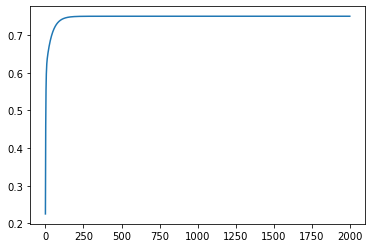

In [10]:
AND_result = validate(AND_X, AND_W, AND_b, AND_Y, 'AND')
print()
activation_func(AND_result, 'AND')
print()

# Execute OR

$ 0th i loss: 0.375 || w1: [0.] || w2: [0.]
$ 500th i loss: 0.03125000000000075 || w1: [0.50000005] || w2: [0.50000005]
$ 1000th i loss: 0.03125 || w1: [0.5] || w2: [0.5]
$ 1500th i loss: 0.031249999999999993 || w1: [0.5] || w2: [0.5]
OR
: [[1.25]
 [0.75]
 [0.75]
 [0.25]]

OR_Perceptron
: [[1.]
 [1.]
 [1.]
 [0.]]



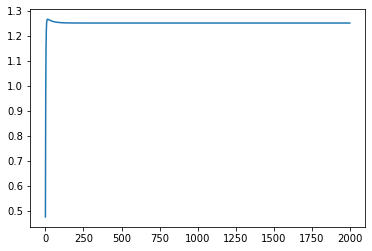

In [11]:
OR_result = validate(OR_X, OR_W, OR_b, OR_Y, 'OR')
print()
activation_func(OR_result, 'OR')
print()

# Execute XOR

## Linear Regression

$ 0th i loss: 0.25 || w1: [0.] || w2: [0.]
$ 500th i loss: 0.1250000000000423 || w1: [3.65252467e-07] || w2: [3.65252467e-07]
$ 1000th i loss: 0.125 || w1: [4.62077906e-13] || w2: [4.62077906e-13]
$ 1500th i loss: 0.12499999999999999 || w1: [5.24888302e-16] || w2: [5.24888302e-16]
XOR
: [[0.5]
 [0.5]
 [0.5]
 [0.5]]

XOR_Perceptron
: [[0.]
 [0.]
 [0.]
 [1.]]



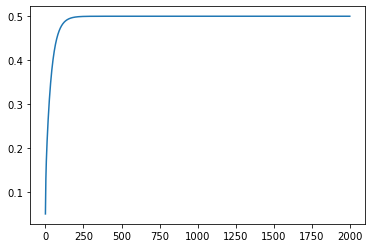

In [12]:
XOR_result = validate(XOR_X, XOR_W, XOR_b, XOR_Y, 'XOR')
print()
activation_func(XOR_result, 'XOR')
print()

# Circuit Aspect

<img src='https://camo.githubusercontent.com/a09eff0c121bf74961678f66891765aed56c4f719b23d69bd7cb9b8696280399/687474703a2f2f692e696d6775722e636f6d2f32756d5a492e706e67' />

In [13]:
activation_func((1 - AND_result) * OR_result, 'XOR_alt')

XOR_alt_Perceptron
: [[0.]
 [1.]
 [1.]
 [0.]]
